In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
syp500 = yf.download("^GSPC", start="2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
syp500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000


In [ ]:
syp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5825 entries, 2000-01-03 to 2023-02-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5825 non-null   float64
 1   High       5825 non-null   float64
 2   Low        5825 non-null   float64
 3   Close      5825 non-null   float64
 4   Adj Close  5825 non-null   float64
 5   Volume     5825 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.6 KB


In [ ]:
syp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5825.000000,5825.000000,5825.000000,5825.000000,5825.000000,5.825000e+03
mean,1887.574947,1898.868162,1875.332467,1887.788264,1887.788264,3.302643e+09
std,977.682600,982.809323,972.092278,977.805923,977.805923,1.522626e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.630005,1191.800049,1177.250000,1184.520020,1184.520020,1.986750e+09
50%,1434.540039,1443.900024,1425.780029,1434.540039,1434.540039,3.409000e+09
75%,2392.439941,2399.290039,2381.149902,2391.169922,2391.169922,4.159470e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [ ]:
syp500.rename(columns = {'Adj Close':'precio'}, inplace = True)

In [ ]:
#Media movil de 5 periodos
syp500['media_movil(5)'] = pd.Series(syp500['precio']).rolling(window=5).mean().iloc[:].values

In [ ]:
#Media movil exponencial de 12 periodos
syp500['EWM(12)'] = syp500['precio'].ewm(span = 12).mean()

In [ ]:
fig1 = px.line(syp500, y=['precio'], width=1000, height=400, color_discrete_map = {'precio':'blue'})

fig = go.Figure(data=fig1.data)

fig.update_layout(
    width       = 1200,
    height      = 500,
    title       = dict(text='<b>SYP500 historial completo</b>', font=dict(size=25)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=13)),
    yaxis       = dict(nticks=40),
    xaxis       = dict(nticks=60),
    xaxis_title = dict(text='fecha', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20) 
    )

fig.show()

In [ ]:
fig1 = px.line(syp500.tail(180), y=['precio'], width=1000, height=400, color_discrete_map = {'precio':'blue'})
fig2 = px.line(syp500.tail(180), y=['media_movil(5)','EWM(12)'], width=1000, height=400, line_dash_sequence=['longdashdot','dash'])

fig = go.Figure(data=fig1.data + fig2.data)

fig.update_layout(
    width       = 1200,
    height      = 500,
    title       = dict(text='<b>SYP500 Ultimos 6 meses</b>', font=dict(size=25)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=13)),
    yaxis       = dict(nticks=40),
    xaxis       = dict(nticks=60),
    xaxis_title = dict(text='día', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20) 
    )

fig.show()

# Oscilador estocástico

Estocástico Rápido (%K)

promedio móvil aritmético de n períodos (%D)

Para calcular el estocástico lento , todo lo que necesitamos hacer es   calcular el promedio móvil aritmético de las curvas anteriores

%KL = MMA(%K,3) = %D

%DL = MMA (%D) D=M M A ( % D )

In [ ]:
# Para calcular la curva rapida %K, primero debemos aislar los máximos y mínimos del período elegido (window = 5)
highest_high_5 = syp500["High"].rolling(window=5).max()
lowest_low_5 = syp500["Low"].rolling(window=5).min()

In [ ]:
#Ahora solo insértelos en la fórmula estocástica y tendremos los valores para la curva %K del estocástico rápido.
syp500["%K"] = ((syp500["precio"] - lowest_low_5) / (highest_high_5 - lowest_low_5)) * 100

In [ ]:
#con los valores de %K definido, podemos calcular la media móvil aritmética %D. La función utilizada es la misma pero asociada a la media
syp500["%D"] = syp500['%K'].rolling(window = 5).mean()

In [ ]:
syp500["Slow %K"] = syp500["%D"]
syp500["Slow %D"] = syp500["Slow %K"].rolling(5).mean()

In [ ]:
syp500.tail()

,Open,High,Low,Close,precio,Volume,media_movil(5),EWM(5),%K,%D,Slow %K,Slow %D
Date,,,,,,,,,,,,
2023-02-21,4052.350098,4052.350098,3995.189941,3997.340088,3997.340088,4121590000,4090.114014,4068.831776,1.306444,44.580180,44.580180,50.718585
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,4061.098047,4042.904533,8.264792,31.009889,31.009889,48.685892
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000,4034.042041,4032.709712,25.772394,18.623436,18.623436,41.768888
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000,4009.968066,4011.819821,19.475529,16.533518,16.533518,33.656811
2023-02-27,3992.360107,4018.050049,3992.360107,4016.840088,4016.840088,302636270,3997.518066,4013.493243,67.502514,24.464334,24.464334,27.042271


# Convergencia/divergencia de medias móviles (MACD)

El indicador tecnico Moving Average Convergence/Divergence se determina restando

la media movil exponencial de 26 per´ıodos de la media movil exponencial de 12 perıodos.

Luego por encima del grafico del MACD se puntea una media movil simple de 9 perıodos
(la lınea de señal).

SIGNAL = SMA(MACD, 9) 

MACD = EMA(CLOSE, 12) − EMA(CLOSE, 26) 

Donde:

EMA – media movil exponencial

SMA – media movil simple

SIGNAL – lınea de señal del indicador

In [ ]:
#Calculamos la media exponencial de 26 periodos
syp500['EWM(26)'] = syp500['precio'].ewm(span = 26).mean()
#Calculamos MACD
syp500['MACD'] = syp500['EWM(12)'] - syp500['EWM(26)']
#Calculamos signal
syp500['signal'] = pd.Series(syp500['MACD']).rolling(window=9).mean().iloc[:].values
#Calculamos histograma correspondiente a la formula
syp500['histograma'] = syp500['MACD'] - syp500['signal']

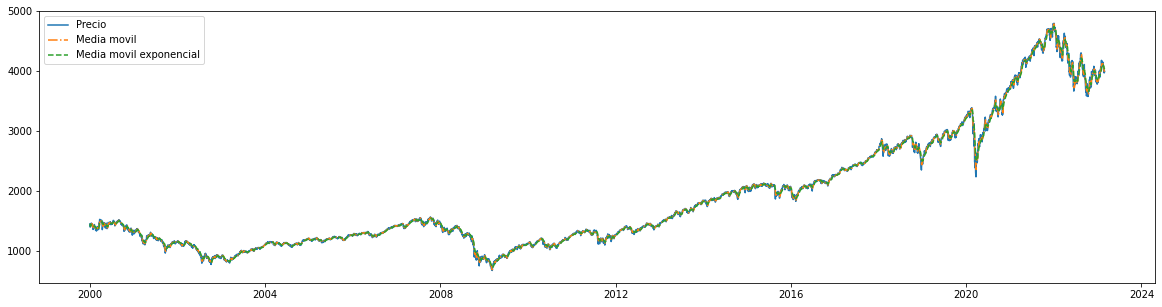

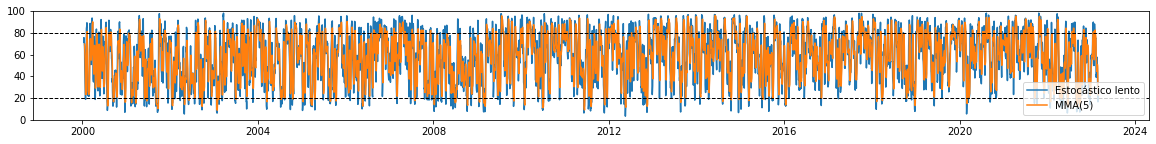

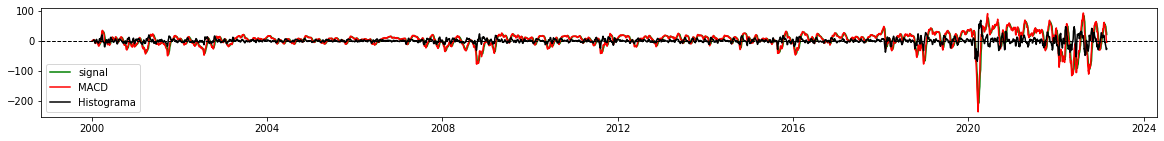

In [ ]:
#Graficamos los datos desde el año 2000

fig, ax = plt.subplots(figsize=(20,5))

plt.plot(syp500['precio'], label = 'Precio')
plt.plot(syp500['media_movil(5)'], label = 'Media movil', linestyle = 'dashdot')
plt.plot(syp500['EWM(12)'], label = 'Media movil exponencial', linestyle = 'dashed')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,2))

plt.plot(syp500['Slow %K'], label = 'Estocástico lento')
plt.plot(syp500['Slow %D'], label = 'MMA(5)')
plt.axhline(y=20.0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=80.0, color='black', linestyle='--', linewidth=1)
plt.ylim(0,100)
plt.legend()

plt.show()

fig, ax = plt.subplots(figsize=(20,2))

plt.plot(syp500['signal'], label = 'signal', color = 'g')
plt.plot(syp500['MACD'], label = 'MACD', color = 'r')
plt.plot(syp500['histograma'], label = 'Histograma', color = 'black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

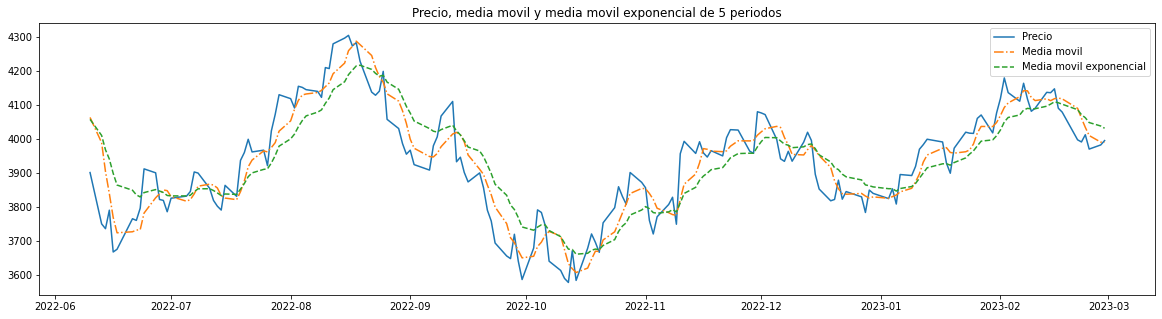

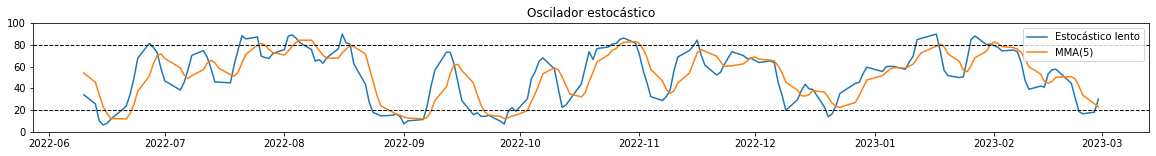

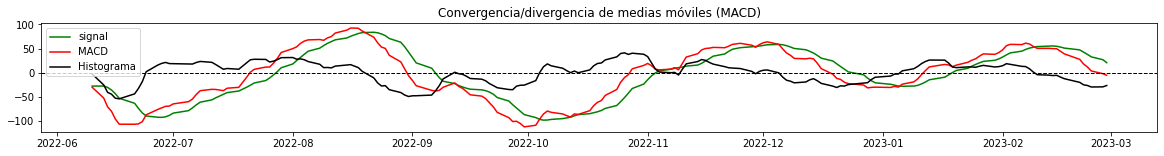

In [ ]:
#Usamos pd.tail() para elegir los dias que queremos mostrar, teniendo como ultima fecha el dia de ayer

fig, ax = plt.subplots(figsize=(20,5))

plt.plot(syp500['precio'].tail(180), label = 'Precio')
plt.plot(syp500['media_movil(5)'].tail(180), label = 'Media movil', linestyle = 'dashdot')
plt.plot(syp500['EWM(12)'].tail(180), label = 'Media movil exponencial', linestyle = 'dashed')
plt.title('Precio, media movil y media movil exponencial de 5 periodos')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,2))

plt.plot(syp500['Slow %K'].tail(180), label = 'Estocástico lento')
plt.plot(syp500['Slow %D'].tail(180), label = 'MMA(5)')
plt.axhline(y=20.0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=80.0, color='black', linestyle='--', linewidth=1)
plt.title('Oscilador estocástico')
plt.ylim(0,100)
plt.legend()

plt.show()

fig, ax = plt.subplots(figsize=(20,2))

plt.plot(syp500['signal'].tail(180), label = 'signal', color = 'g')
plt.plot(syp500['MACD'].tail(180), label = 'MACD', color = 'r')
plt.plot(syp500['histograma'].tail(180), label = 'Histograma', color = 'black')
plt.title('Convergencia/divergencia de medias móviles (MACD)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.show()

# Bandas bollinger

Banda media de bollinger: esta banda de bollinger se extrae de la media móvil de 20 períodos

Banda superior de bollinger: esta banda de bollinger tiene un cálculo más complejo. Para calcular la banda superior de bollinger a la media móvil hay que sumar dos veces (2x) la desviación típica de la media móvil de 20 periodos.

Banda inferior de bollinger: la banda inferior se calcula de la misma forma que la banda superior pero en vez de sumar la media móvil simple de 20 días, hay que restar la media móvil.

# Debemos crear una funcion para aplicar bandas de bollinger a un periodo de tiempo reducido
## si lo aplicamos sobre los 20 años de datos la informacion no será legible
### esta función servirá también para realizar todos los graficos en un periodo de tiempo, teniendo siempre como ultima fecha el dia de ayer

In [ ]:
def temporalidad_syp500(dias):
  df = syp500.tail(dias)
  #Calculamos banda media de bollinger, es decir la media movil de 20 periodos
  df['media_bollinger'] = pd.Series(df['precio']).rolling(window=20).mean().iloc[:].values
  #Calculamos desviacion standar para el periodo que deseamos trabajar
  ds = df['media_bollinger'].std()
  #superior de bollinger
  df['superior_bollinger'] = df['media_bollinger'] + (2*ds)
  #inferior de bollinger
  df['inferior_bollinger'] = df['media_bollinger'] - (2*ds)

  #Grafico del precio + media movil + media movil exponencial
  fig, ax = plt.subplots(figsize=(18,4))

  plt.plot(df['precio'], label = 'Precio')
  plt.plot(df['media_movil(5)'], label = 'Media movil', linestyle = 'dashdot')
  plt.plot(df['EWM(12)'], label = 'Media movil exponencial', linestyle = 'dashed')
  plt.title('Precio, media movil y media movil exponencial de 5 periodos')
  plt.legend(loc='upper left')
  plt.show()

  if dias > 45:
    #Grafico del precio + bandas de bollinger
    fig, ax = plt.subplots(figsize=(18,4))

    plt.plot(df['precio'], label = 'Precio')
    plt.plot(df['superior_bollinger'], label = 'Banda superior de Bollinger')
    plt.plot(df['media_bollinger'], label = 'Banda media de Bollinger')
    plt.plot(df['inferior_bollinger'], label = 'Banda inferior de Bollinger')
    plt.title('Bandas de bolinguer')
    plt.legend(loc='upper left')
    plt.show()

    
  #Grafico del oscilador estocastico
  fig, ax = plt.subplots(figsize=(18,2))

  plt.plot(df['Slow %K'], label = 'Estocástico lento')
  plt.plot(df['Slow %D'], label = 'MMA(5)')
  plt.axhline(y=20.0, color='black', linestyle='--', linewidth=1)
  plt.axhline(y=80.0, color='black', linestyle='--', linewidth=1)
  plt.title('Oscilador estocástico')
  plt.ylim(0,100)
  plt.legend(loc='upper left')
  plt.show()

  #Grafico de la media móvil de convergencia/divergencia
  fig, ax = plt.subplots(figsize=(18,2))

  plt.plot(df['signal'], label = 'signal', color = 'g', linestyle='--')
  plt.plot(df['MACD'], label = 'MACD', color = 'r', linestyle='--')
  plt.plot(df['histograma'], label = 'Histograma', color = 'black')
  plt.title('Convergencia/divergencia de medias móviles (MACD)')
  plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
  plt.legend(loc='upper left')
  plt.show()

<ipython-input-18-5d7c3f45e714>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5d7c3f45e714>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-5d7c3f45e714>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



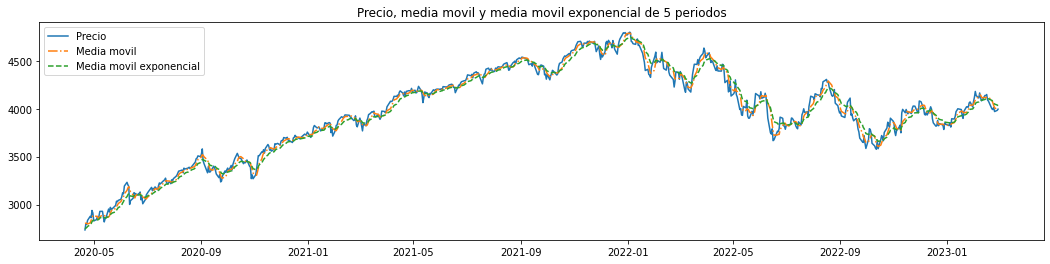

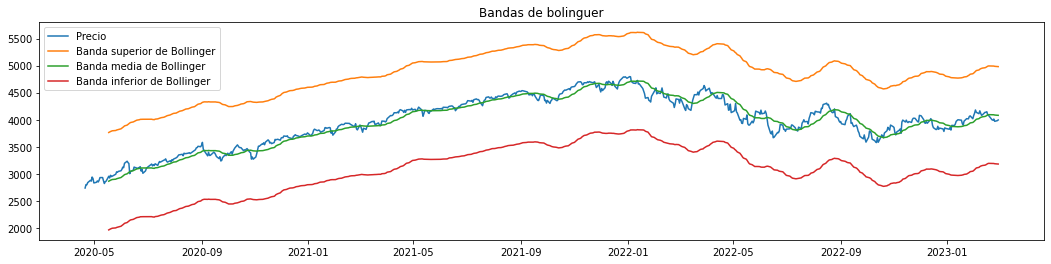

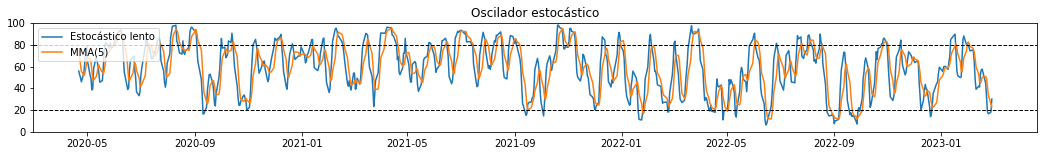

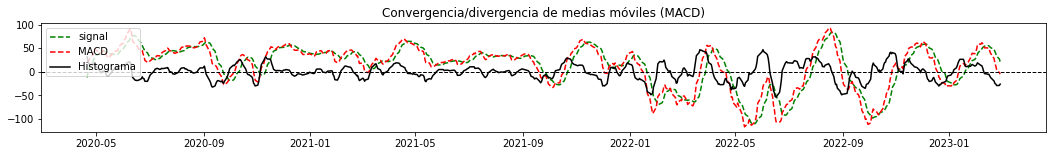

In [ ]:
temporalidad_syp500(720) #Parametro = cuantos días queremos analizar, como ultima fecha el dia de ayer

In [ ]:
syp500.tail()

,Open,High,Low,Close,precio,Volume,media_movil(5),EWM(12),%K,%D,Slow %K,Slow %D,EWM(26),MACD,signal,histograma
Date,,,,,,,,,,,,,,,,
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000,4061.098047,4071.523913,8.264792,31.009889,31.009889,48.685892,4053.207656,18.316257,42.901312,-24.585055
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000,4034.042041,4062.415629,25.772394,18.623436,18.623436,41.768888,4050.178946,12.236683,38.208855,-25.972172
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000,4009.968066,4048.204000,19.475529,16.533518,16.533518,33.656811,4044.242731,3.961270,33.029650,-29.068381
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000,3990.598047,4038.055691,35.837746,18.131381,18.131381,25.775681,4039.649935,-1.594244,27.221167,-28.815411
2023-02-28,3977.189941,3997.500000,3970.179932,3995.090088,3995.090088,1102525000,3990.148047,4031.445598,61.030307,30.076154,30.076154,22.874876,4036.349206,-4.903607,21.110032,-26.013639
